In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sllm
import sklearn.model_selection as slms

In [2]:
data=pd.read_csv("Cars93.csv")
Y=data['Price']
X=data[['MPG.highway','MPG.city', 'EngineSize','Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']]
n_params=np.shape(X)[1]

In [3]:
n_it=5000
coef=np.zeros([n_params,n_it])

barrido_lambdas=np.linspace(0,3.5,5000)
for i in range(n_it):
    sk_lasso=sllm.Lasso(alpha=barrido_lambdas[i],normalize=True)
    sk_lasso.fit(X,Y)
    
    coef[:,i]=sk_lasso.coef_

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


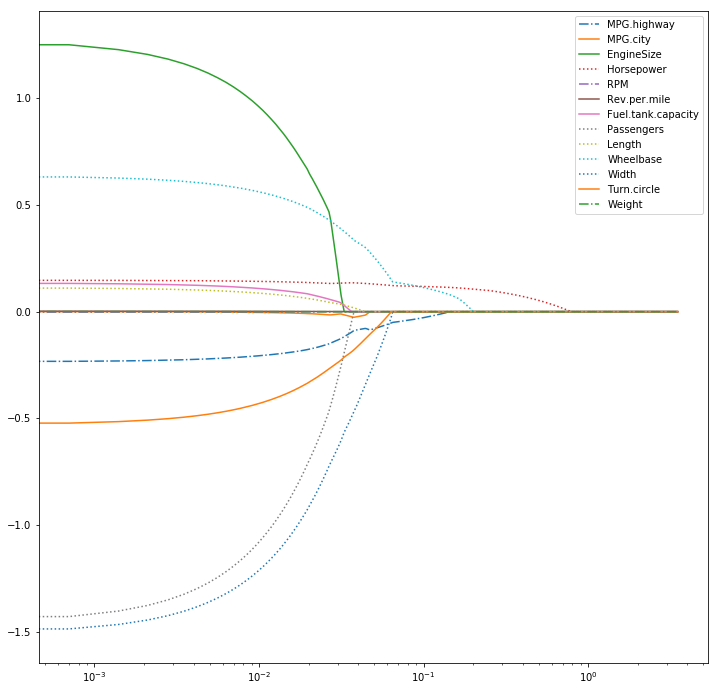

In [4]:
plt.figure(figsize=[12,12])
for i in range (n_params):
    #plt.plot(barrido_lambdas,coef[i,:])
    plt.semilogx(barrido_lambdas,coef[i,:],label=X.keys()[i],linestyle=np.random.choice(['-',':','-.']))
plt.legend()

In [5]:
def  MSE(y,y_obs):
    return 1/(len(y))*np.sum((y-y_obs)**2)



In [ ]:
#x_keys=X.keys()
X=np.array(X)
MSE_lambda=np.zeros([n_it])
for i in range(n_it):

#        x=data[x_keys[np.arange(n_params)!=j]]
#        x_j=data[x_keys[j]].values.reshape(1,-1)
#        
    loo=slms.LeaveOneOut()
    mse=[]
    for train_i,test_i in loo.split(X):
        Xtr=X[train_i,:]
        Y_tr=Y[train_i].values.reshape(1,-1).T
        Xts=X[test_i,:]
        sk_lasso=sllm.Lasso(alpha=barrido_lambdas[i],normalize=True)
        sk_lasso.fit(Xtr,Y_tr)
        y_lasso=sk_lasso.predict(Xts)
        mse.append(MSE(y_lasso,Y))
    MSE_lambda[i]=np.mean(np.array(mse))
        
            
        
        
     #   sk_lasso=sllm.Lasso(alpha=barrido_lambdas[i],normalize=True)
    #    sk_lasso.fit(x,Y)
   #     y_lasso=sk_lasso.predict(x_j)
  #      
 #       mse=MSE(y_lasso,Y)
#    MSE_lambda[i]=np.mean(mse_it)

    


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWar

In [ ]:
x_j

In [ ]:
X[1,:]

In [ ]:
print(Y_tr.T.shape)
print(Xtr.shape)